In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

#### Task 1: Merging 12 months of sales data into a single csv file

In [3]:
all_month_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data,df])
    
all_month_data.to_csv('all_data.csv',index = False)

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data!

#### Drop rows of NaN

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Find 'or' and delete it

In [9]:
all_data = all_data[all_data['Month'] != 'Or']

#### Convert column to correct type

In [41]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\140318151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\140318151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


### Augment data with additional column 

#### Task 2: Add month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\1369745424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]
C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\1369745424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add Sales column

In [54]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\4089898328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column.

In [64]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [86]:
result = all_data.groupby('Month').sum()
result.sort_values(by = 'Sales', ascending = False)

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\3676363312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
12,28114,4588415.41,4613443.34,359978,733082
10,22703,3715554.83,3736726.88,290650,598437
4,20558,3367671.02,3390670.24,262259,544186
11,19798,3180600.68,3199603.20,254865,518231
5,18667,3135125.13,3152606.75,238780,487899
3,17005,2791207.83,2807100.38,218969,447559
7,16072,2632539.56,2647775.76,206169,417349
6,15253,2562025.61,2577802.26,195528,402436
8,13448,2230345.42,2244467.88,172289,353857


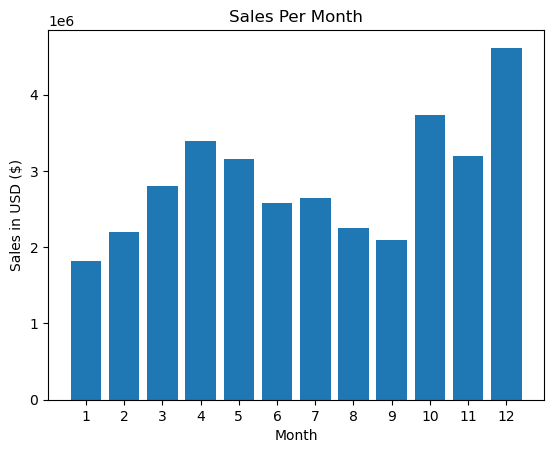

In [87]:
months = range(1,13)
 
# creating the bar plot
plt.bar(months,result['Sales'])

plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")
plt.title("Sales Per Month")
plt.show()

In [68]:
result = all_data.groupby('City').sum()
result.sort_values(by = 'Sales' , ascending = False)

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\4183441658.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


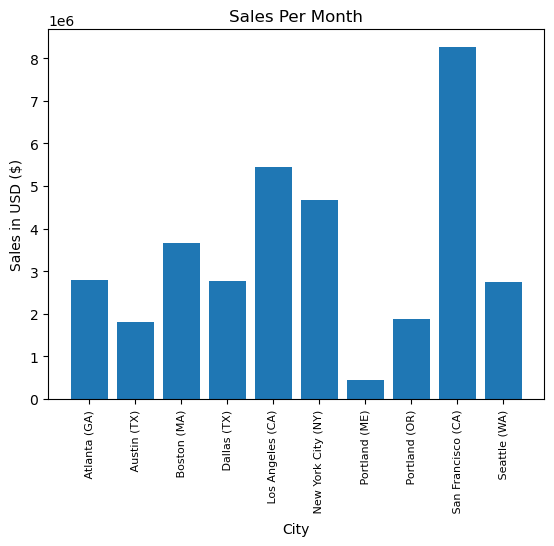

In [73]:
cities = [city for city,df in all_data.groupby('City')]
 
# creating the bar plot
plt.bar(cities,result['Sales'])

plt.xticks(cities ,rotation = 'vertical',size = 8)
plt.xlabel("City")
plt.ylabel("Sales in USD ($)")
plt.title("Sales Per Month")
plt.show()

#### Question 3: What time should we display advertisements to maximize the likelihood of customer's buying product?

In [74]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [75]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [79]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


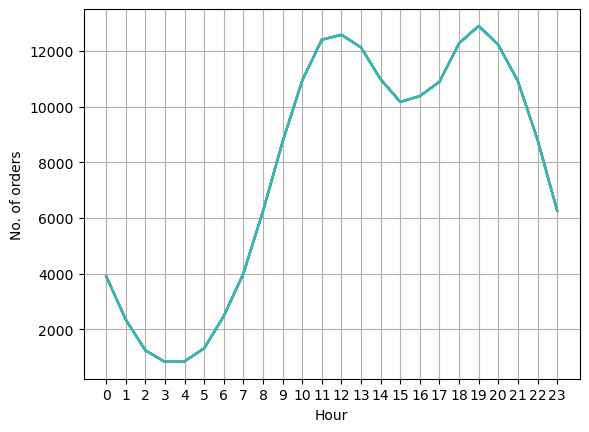

In [82]:
hour = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hour,all_data.groupby('Hour').count())
plt.xticks(hour)
plt.xlabel('Hour')
plt.ylabel('No. of orders')
plt.grid()
plt.show()

#### Question 4: What products  are most often sold together?

In [95]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\774539005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [100]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,val in count.most_common(10):
    print(key,val)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What products are sold most? 

In [105]:
product_group = all_data.groupby('Product').sum()['Quantity Ordered']
product_group.sort_values(ascending = False)

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\3216821967.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = all_data.groupby('Product').sum()['Quantity Ordered']


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

C:\Users\Kritika\AppData\Local\Temp\ipykernel_2348\1835969146.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


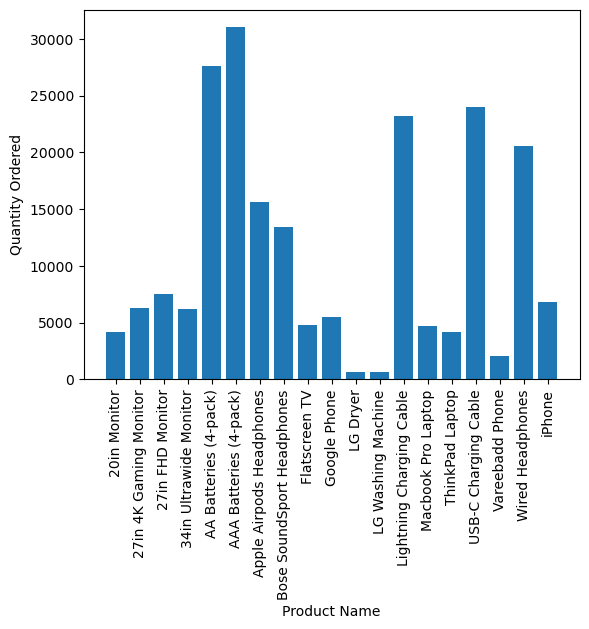

In [110]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = 'vertical')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()